In [1]:
from collections import namedtuple

import numpy as np
import numpy.matlib as npm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import h5py
import face_alignment

from _3DMM import _3DMM
import fitting

/home/mint/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [13]:
import importlib
importlib.reload(fitting)

<module 'fitting' from '/home/mint/Documents/iva-test/fitting.py'>

/home/mint/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


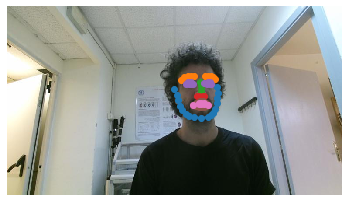

In [3]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cpu')

input_img = mpimg.imread('LR/claudio_ferrari/rgbReg_frames/0001/1916.jpg')
preds = fa.get_landmarks_from_image(input_img)[-1]

# 2D-Plot
pred_type = namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), 'C0'),
              'eyebrow1': pred_type(slice(17, 22), 'C1'),
              'eyebrow2': pred_type(slice(22, 27), 'C1'),
              'nose': pred_type(slice(27, 31), 'C2'),
              'nostril': pred_type(slice(31, 36), 'C3'),
              'eye1': pred_type(slice(36, 42), 'C4'),
              'eye2': pred_type(slice(42, 48), 'C4'),
              'lips': pred_type(slice(48, 60), 'C5'),
              'teeth': pred_type(slice(60, 68), 'C6')
              }

fig, ax = plt.subplots()
ax.imshow(input_img)

for pred_type in pred_types.values():
    ax.plot(preds[pred_type.slice, 0],
            preds[pred_type.slice, 1],
            color=pred_type.color,
            marker='o')

ax.axis(False);

#plt.show()

In [4]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [5]:
#%matplotlib widget

(20112, 300) (300, 1) (6704, 3, 300)
Data Loaded.
3DMM Fitting Completed


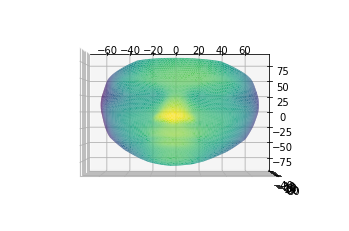

In [15]:
result = fitting.fit_3dmm(preds)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d', elev=90, azim=-90)
#ax.mouse_init()
#ax.view_init(90, -90)

#def_shape = result['defShape']
#ax.scatter3D(*def_shape.transpose(), s=1, c=def_shape[:, 2])
ax.plot_trisurf(*result['defShape'].transpose(), cmap='viridis')

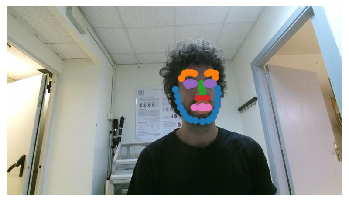

In [7]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cpu')

input_img = mpimg.imread('LR/claudio_ferrari/rgbReg_frames/0002/3029.jpg')
preds = fa.get_landmarks_from_image(input_img)[-1]

# 2D-Plot
pred_type = namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), 'C0'),
              'eyebrow1': pred_type(slice(17, 22), 'C1'),
              'eyebrow2': pred_type(slice(22, 27), 'C1'),
              'nose': pred_type(slice(27, 31), 'C2'),
              'nostril': pred_type(slice(31, 36), 'C3'),
              'eye1': pred_type(slice(36, 42), 'C4'),
              'eye2': pred_type(slice(42, 48), 'C4'),
              'lips': pred_type(slice(48, 60), 'C5'),
              'teeth': pred_type(slice(60, 68), 'C6')
              }

fig, ax = plt.subplots()
ax.imshow(input_img)

for pred_type in pred_types.values():
    ax.plot(preds[pred_type.slice, 0],
            preds[pred_type.slice, 1],
            color=pred_type.color,
            marker='o')

ax.axis(False);

#plt.show()

In [14]:
result = fitting.fit_3dmm1(preds)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(result['defShape'][:, 0],
             result['defShape'][:, 1],
             result['defShape'][:, 2],
             c=result['defShape'][:, 2])

ax.view_init(90, -90)

<KeysViewHDF5 ['Components', 'Weights']>
(20112, 50) (1, 50) (6704, 3, 300)
Data Loaded.


ValueError: cannot reshape array of size 50 into shape (1,1)